In [1]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
file = gzip.open('goemotions.json.gz')
json_file = json.load(file)

In [3]:
print(json_file)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
emotions = np.array([])
sentiments = np.array([])
posts = np.array([1])
json_file = np.asarray(json_file)

posts = json_file[:,0]
emotions = json_file[:,1]
sentiments = json_file[:,2]

/home/kevin/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


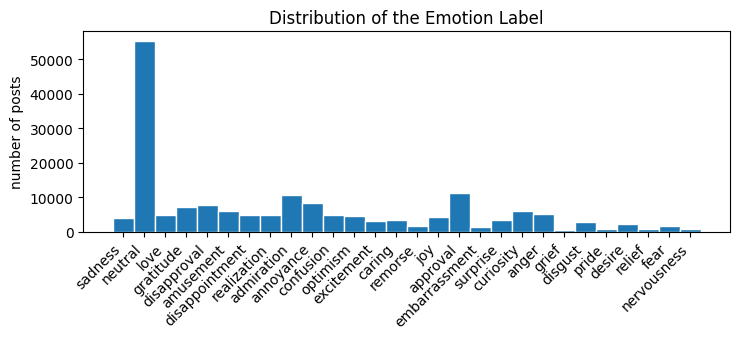

/home/kevin/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


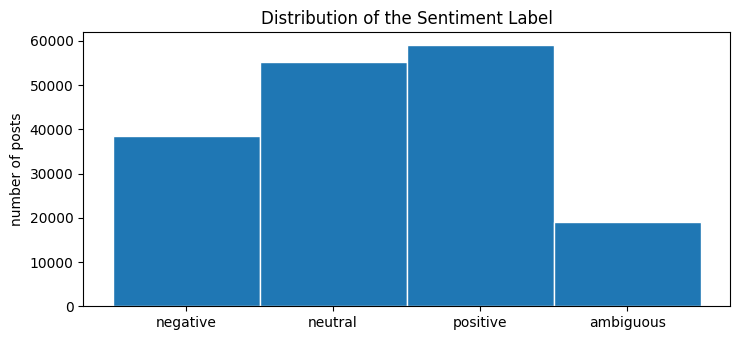

In [5]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.hist(emotions, bins=range(29), align="left", ec="white")
plt.xticks(rotation=45, ha="right")
plt.ylabel("number of posts")
plt.title("Distribution of the Emotion Label")
plt.savefig("emotion.pdf", format="pdf")
plt.show()
plt.ylabel("number of posts")
plt.hist(sentiments, bins=range(5), align="left", ec="white")
plt.title("Distribution of the Sentiment Label")
plt.savefig("sentiment.pdf", format="pdf")
plt.show()

In [6]:
vectorizer = CountVectorizer()

In [7]:
text_dataset = vectorizer.fit_transform(posts)

In [14]:
"""
each column in the feature vector refers to a word/token.
each row in the feature vector is a post.
if said post uses a word in the vectorizer's vocabulary exactly once, then it will be shown as a 1
in the corresponding index of the vectorizer's vocabulary.
therefore, adding up the column for each column will give you the frequency of each word
"""
def word_frequencies(dataset, vectorizer):
    frequencies = text_dataset.sum(axis=0).tolist()
    total_sum = np.asarray(frequencies).sum()
    words = vectorizer.vocabulary_.keys()
    indices = vectorizer.vocabulary_.values()
    frequencies = list(map(lambda index: frequencies[0][index], indices))
    return dict(zip(words, frequencies)), total_sum

frequencies, total_sum = word_frequencies(text_dataset, vectorizer)

In [11]:
frequencies

{'that': 37748,
 'game': 2323,
 'hurt': 469,
 'you': 42828,
 'do': 7370,
 'right': 3492,
 'if': 9684,
 'don': 8528,
 'care': 903,
 'then': 3460,
 'fuck': 1452,
 'em': 216,
 'man': 2955,
 'love': 5703,
 'reddit': 872,
 'name': 31843,
 'was': 15008,
 'nowhere': 71,
 'near': 229,
 'them': 5185,
 'he': 13361,
 'by': 3780,
 'the': 71411,
 'falcon': 9,
 'considering': 261,
 'it': 41895,
 'such': 1108,
 'an': 5780,
 'important': 343,
 'document': 26,
 'should': 3191,
 'know': 5592,
 'damned': 50,
 'thing': 2787,
 'backwards': 47,
 'and': 34790,
 'forwards': 16,
 'thanks': 3269,
 'again': 1337,
 'for': 21087,
 'help': 1363,
 'isn': 1836,
 'as': 8490,
 'big': 1190,
 'but': 13752,
 'still': 3662,
 'quite': 441,
 'popular': 119,
 've': 4431,
 'heard': 806,
 'same': 2670,
 'about': 7816,
 'his': 5074,
 'content': 155,
 'never': 3319,
 'watched': 303,
 'him': 4999,
 'much': 3644,
 'crazy': 694,
 'went': 845,
 'to': 49931,
 'super': 709,
 'religion': 574,
 'high': 787,
 'school': 765,
 'think': 5864

In [15]:
total_sum

2048717